# 데이터셋 시각화

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data0 = pd.read_csv("./trainset/mask_rgb_info0.csv").iloc[:,:5]
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   target     248 non-null    object 
 1   file_name  248 non-null    object 
 2   origin_r   248 non-null    float64
 3   origin_g   248 non-null    float64
 4   origin_b   248 non-null    float64
dtypes: float64(3), object(2)
memory usage: 9.8+ KB


In [4]:
data0["target"].value_counts()

target
unripe       100
semi-ripe     88
ripe          60
Name: count, dtype: int64

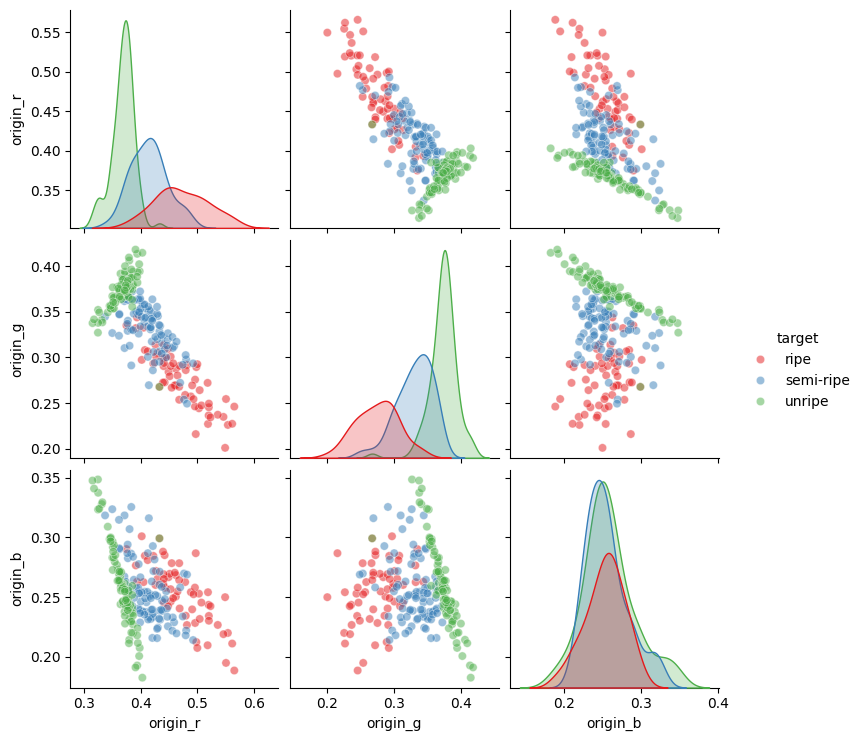

In [5]:
data0 = pd.read_csv("./trainset/mask_rgb_info0.csv").iloc[:,:5]

# 산점도 행렬 그리기
sns.pairplot(data0, hue='target', palette='Set1', plot_kws={'alpha': 0.5})
plt.show()

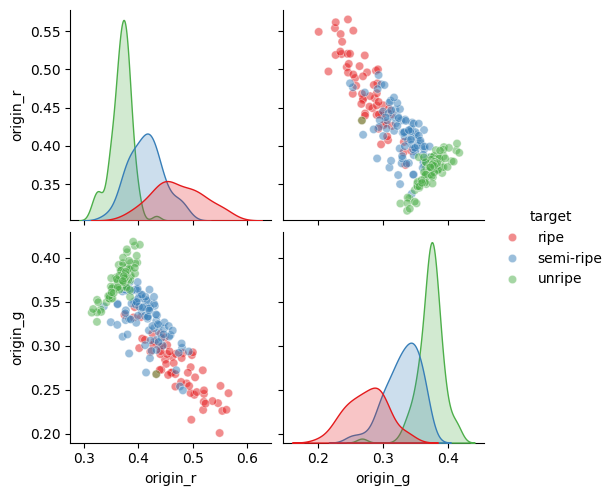

In [6]:
data0 = pd.read_csv("./trainset/mask_rgb_info0.csv").iloc[:,:4]

# 산점도 행렬 그리기
sns.pairplot(data0, hue='target', palette='Set1', plot_kws={'alpha': 0.5})
plt.show()

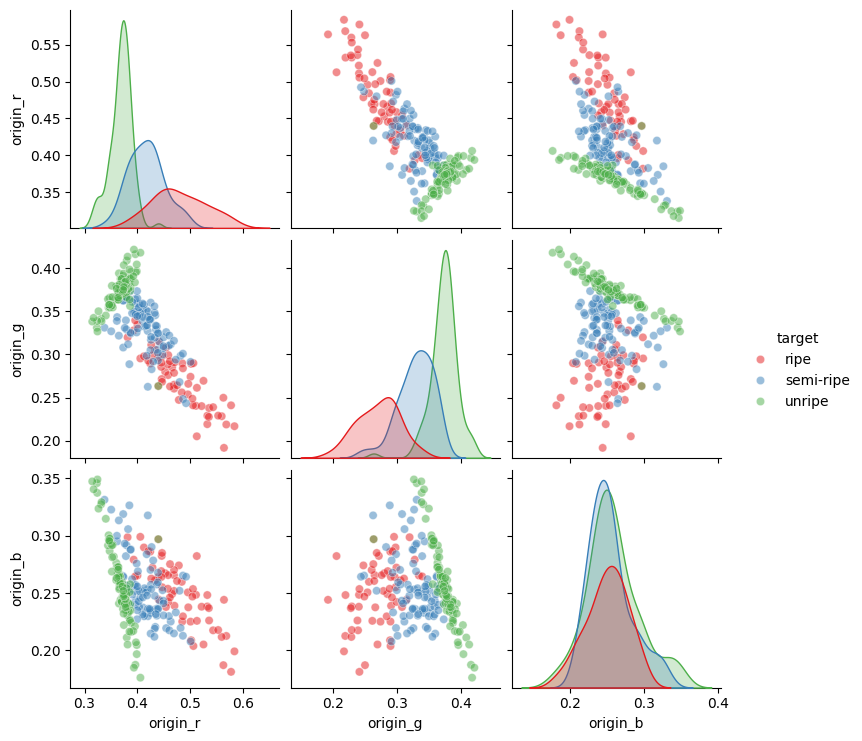

In [7]:
data1 = pd.read_csv("./trainset/mask_rgb_info.csv").iloc[:,:5]

# 산점도 행렬 그리기
sns.pairplot(data1, hue='target', palette='Set1', plot_kws={'alpha': 0.5})
plt.show()

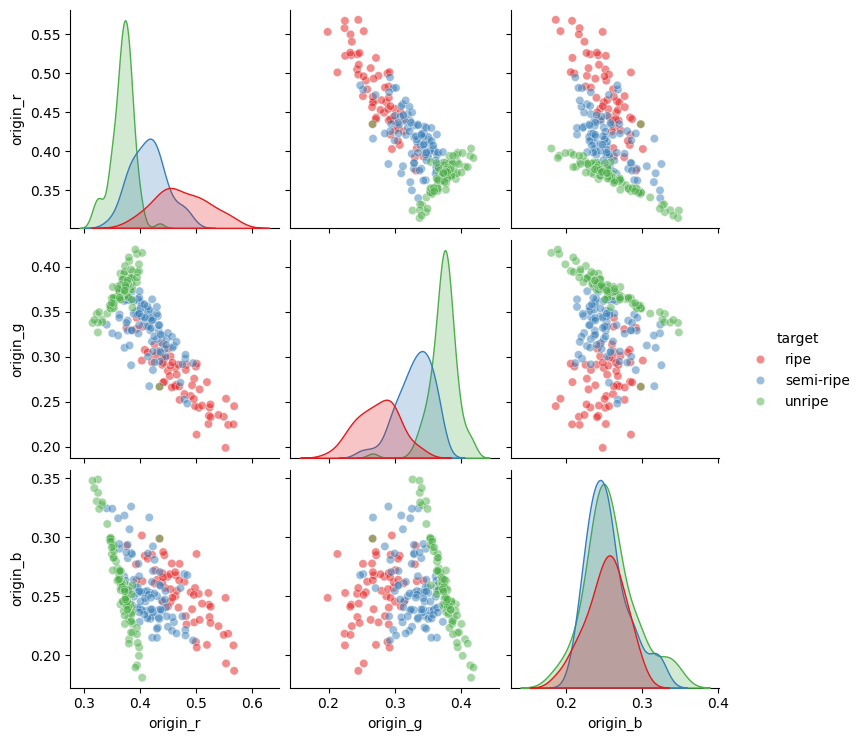

In [8]:
data2 = pd.read_csv("./trainset/mask_rgb_info2.csv").iloc[:,:5]

# 산점도 행렬 그리기
sns.pairplot(data2, hue='target', palette='Set1', plot_kws={'alpha': 0.5})
plt.show()

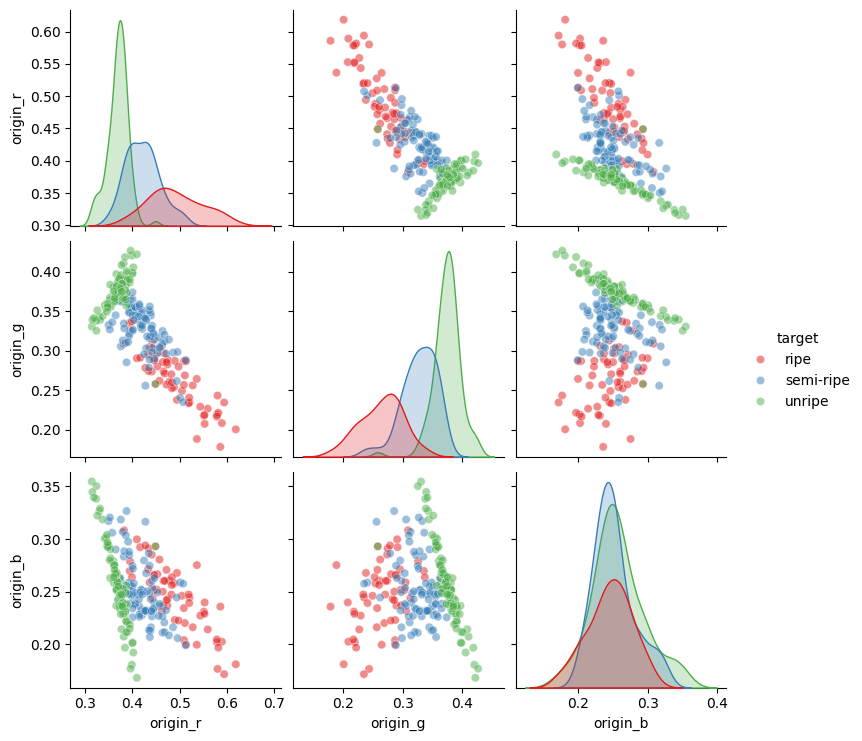

In [9]:
data3 = pd.read_csv("./trainset/mask_rgb_info3.csv").iloc[:,:5]

# 산점도 행렬 그리기
sns.pairplot(data3, hue='target', palette='Set1', plot_kws={'alpha': 0.5})
plt.show()

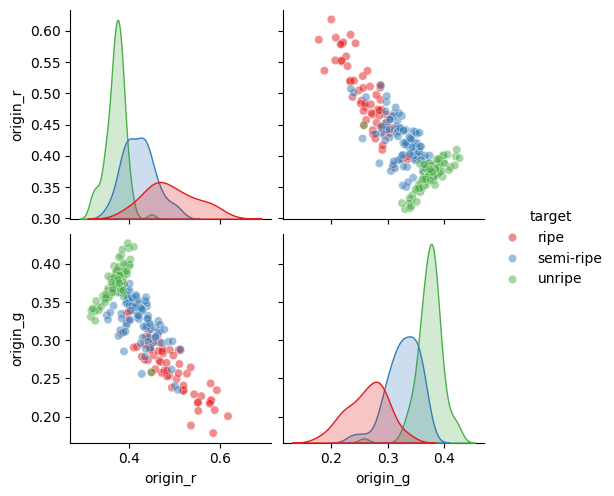

In [10]:
data3 = pd.read_csv("./trainset/mask_rgb_info3.csv").iloc[:,:4]

# 산점도 행렬 그리기
sns.pairplot(data3, hue='target', palette='Set1', plot_kws={'alpha': 0.5})
plt.show()

---

# K-NN 실험

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

rs = 42

def prepare_data(df):
    X = df.drop(columns=['target'])
    y = df['target']
    
    # X_train, X_test, y_train, y_test
    return train_test_split(X, y, stratify=y, test_size=0.2 , random_state=rs)

def run_knn_gridsearchcv(data):
    # X, X_test, y, y_test = prepare_data(data)
    X = data.drop(columns=['target'])
    y = data['target']

    # 탐색할 k 값의 범위
    param_grid = {'n_neighbors': list(range(3, 51))}

    # KNN 모델
    knn = KNeighborsClassifier()

    # GridSearchCV를 사용하여 최적의 모델 탐색
    grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X, y)

    k_scores = grid_search.cv_results_['mean_test_score']
    k_range = list(range(3, 51))

    plt.plot(k_range, k_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validation Accuracy')
    plt.show()

    print("Best K:", grid_search.best_params_['n_neighbors'])
    print("Best Score:", grid_search.best_score_)

    # 최적의 모델 반환
    best_model = grid_search.best_estimator_

    return best_model

def evaluation(y_test, y_pred, target_names=None):
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=target_names))

    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    # Print confusion matrix
    print(cm)

    # Plot confusion matrix
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
    if target_names is not None:
        plt.xticks(ticks=np.arange(len(target_names)), labels=target_names)
        plt.yticks(ticks=np.arange(len(target_names)), labels=target_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

def evaluate_knn_kfold(data):
    # 데이터를 훈련 세트와 테스트 세트로 분할
    X_train, X_test, y_train, y_test = prepare_data(data)

    # KNN 모델 학습
    best_model = run_knn_gridsearchcv(data)

    # 테스트 세트 예측
    y_pred = best_model.predict(X_test)

    # 예측 결과를 데이터프레임에 추가
    X_test_with_predictions = X_test.copy()
    X_test_with_predictions['actual_target'] = y_test
    X_test_with_predictions['predicted_target'] = y_pred

    # 모델 평가
    target_names = data['target'].unique()
    evaluation(y_test, y_pred, target_names=target_names)  # 만약 클래스의 이름을 지정하고 싶다면, target_names에 클래스 이름 리스트를 전달하세요.

    return best_model, X_test_with_predictions


def run_knn(data, k):
    X_train, X_test, y_train, y_test = prepare_data(data)

    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    target_names = data['target'].unique()
    evaluation(y_test, y_pred, target_names=target_names)

In [12]:
import cv2

# r, g 히스토그램 출력

def print_red_green_histogram(path):
    # 이미지 불러오기
    src = cv2.imread(path, cv2.IMREAD_COLOR)

    # RGB 채널 분리
    _, g, r = cv2.split(src)
    channels = [g, r]
    colors = ['g', 'r']

    # 이미지 출력
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')

    # 각 채널에 대해 히스토그램 계산 및 그리기
    plt.subplot(1, 2, 2)
    for channel, color in zip(channels, colors):
        hist = cv2.calcHist([channel], [0], None, [256], [0, 256])
        plt.plot(hist, color=color)

    plt.xlabel('Intensity')
    plt.ylabel('Count')
    plt.title('Color Histogram')
    plt.xlim([1, 254])
    plt.ylim([0, 200])

    plt.tight_layout()
    plt.show()

In [13]:
data0 = pd.read_csv("./trainset/mask_rgb_info0.csv")[['file_name', 'target', 'origin_r', 'origin_g']]
data0.head()

,file_name,target,origin_r,origin_g
0,F0016-C101-20220124-083000_image_mask_26_maske...,ripe,0.550842,0.254280
1,image_mask_33_masked_cropped.png,ripe,0.462223,0.287383
2,image_mask_19_masked_cropped.png,ripe,0.462221,0.269379
3,image_mask_16_masked_cropped copy.png,ripe,0.498412,0.289237
4,image_mask_22_masked_cropped.png,ripe,0.374877,0.334904


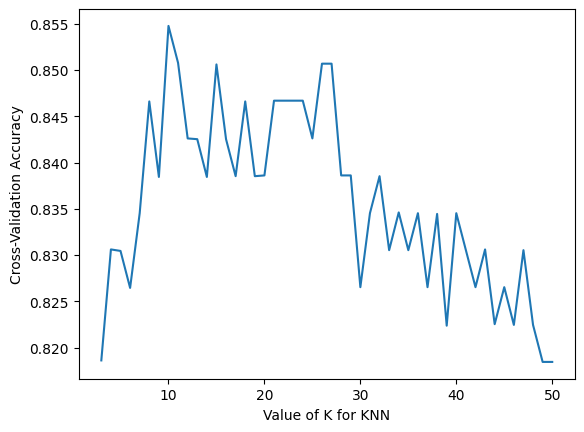

Best K: 10
Best Score: 0.8547755102040817
Classification Report:
              precision    recall  f1-score   support

        ripe       0.82      0.75      0.78        12
   semi-ripe       0.76      0.89      0.82        18
      unripe       1.00      0.90      0.95        20

    accuracy                           0.86        50
   macro avg       0.86      0.85      0.85        50
weighted avg       0.87      0.86      0.86        50

Confusion Matrix:
[[ 9  3  0]
 [ 2 16  0]
 [ 0  2 18]]


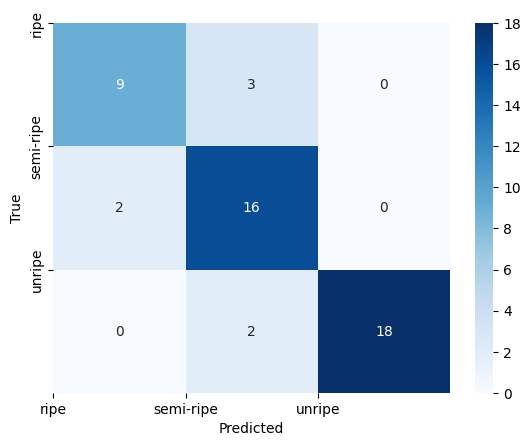

In [14]:
best_model0, X_test_with_predictions0 = evaluate_knn_kfold(data0[['target', 'origin_r', 'origin_g']])

In [27]:
# from sklearn.externals import joblib
import joblib
# import pickle

joblib.dump(best_model0, 'kNN_trained_model.pkl') 

['kNN_trained_model.pkl']

In [8]:
# actual_target, predicted_target + file_name 매칭
data0_pred_result = pd.merge(X_test_with_predictions0, data0["file_name"], left_index=True, right_index=True, suffixes=('_all', '_correct'))
data0_pred_result.head()

,origin_r,origin_g,actual_target,predicted_target,file_name
192,0.359104,0.377227,unripe,unripe,image_mask_26_masked_cropped.png
20,0.449238,0.284107,ripe,ripe,image_mask_38_masked_cropped copy.png
138,0.397274,0.349556,semi-ripe,semi-ripe,image_mask_17_masked_cropped.png
51,0.565506,0.245982,ripe,ripe,image_mask_69_masked_cropped copy.png
14,0.520160,0.236287,ripe,ripe,image_mask_1_masked_cropped.png


In [9]:
# 못 맞춘 경우
data0_false = data0_pred_result[data0_pred_result["actual_target"] != data0_pred_result["predicted_target"]]

In [10]:
data0_false

,origin_r,origin_g,actual_target,predicted_target,file_name
28,0.391477,0.331996,ripe,semi-ripe,image_mask_35_masked_cropped.png
95,0.433123,0.306501,semi-ripe,ripe,image_mask_25_masked_cropped.png
18,0.441279,0.313487,ripe,semi-ripe,image_mask_43_masked_cropped.png
175,0.385113,0.355408,unripe,semi-ripe,image_mask_70_masked_cropped copy.png
243,0.384945,0.363231,unripe,semi-ripe,image_mask_79_masked_cropped.png
135,0.474368,0.291848,semi-ripe,ripe,image_mask_40_masked_cropped copy.png
59,0.448429,0.309171,ripe,semi-ripe,image_mask_84_masked_cropped.png


[ actual target : ripe => predicted target : semi-ripe ]
r : 0.3914773240388863 / g : 0.3319957921148528


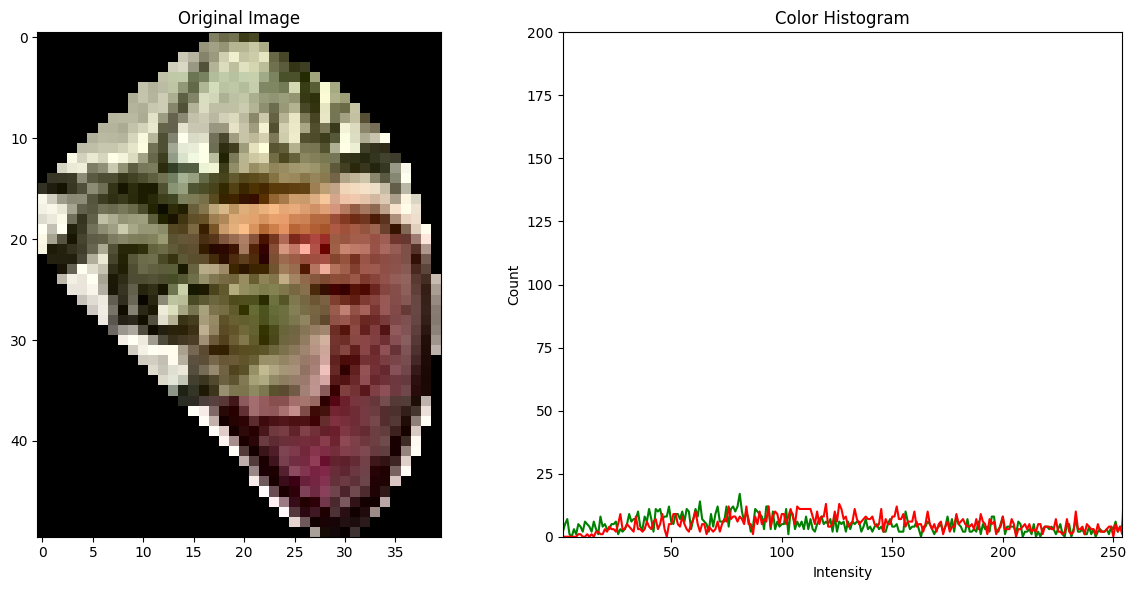

[ actual target : semi-ripe => predicted target : ripe ]
r : 0.4331227991727684 / g : 0.3065013350072877


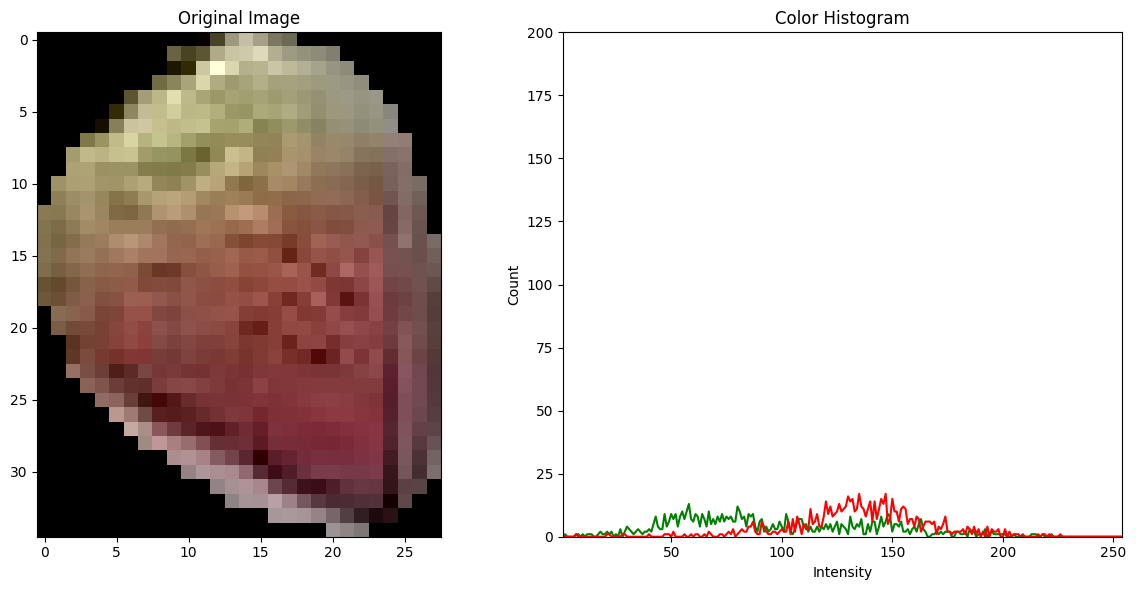

[ actual target : ripe => predicted target : semi-ripe ]
r : 0.4412787751934159 / g : 0.3134866492211176


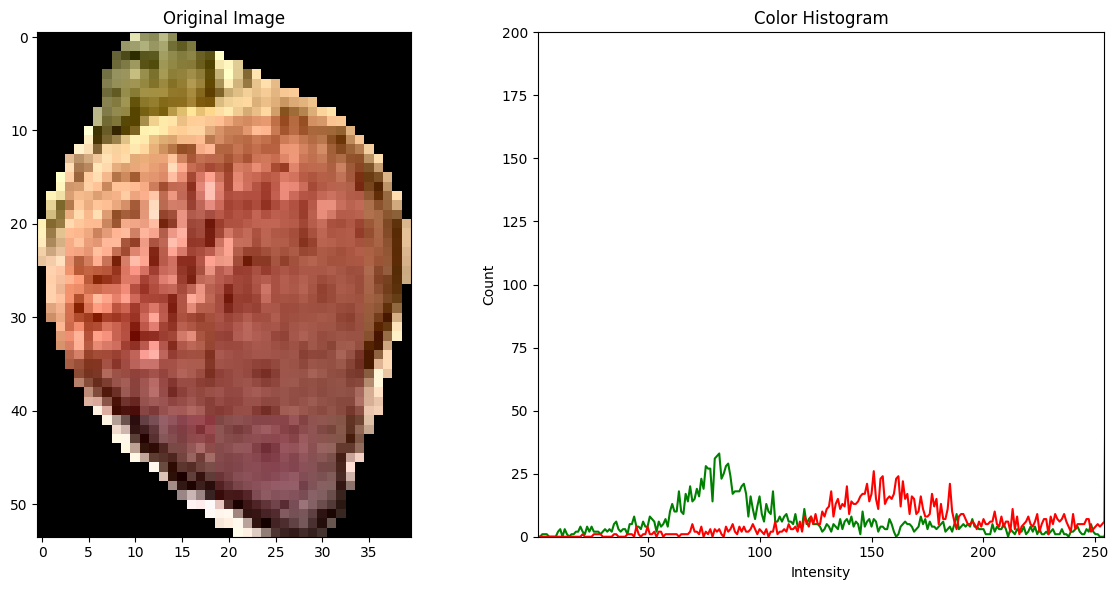

[ actual target : unripe => predicted target : semi-ripe ]
r : 0.3851126259531007 / g : 0.3554077234116128


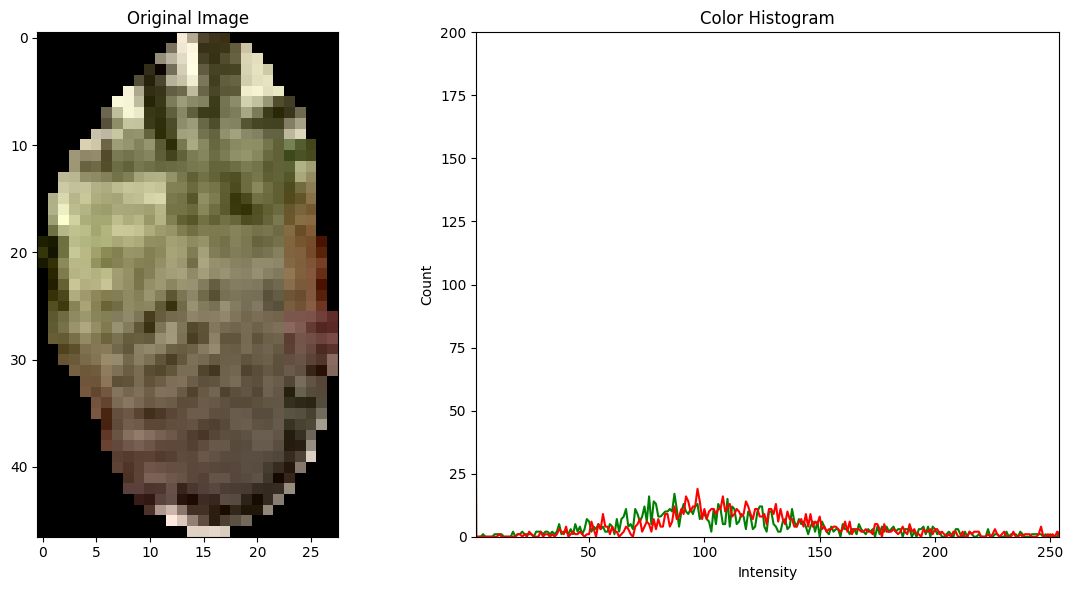

[ actual target : unripe => predicted target : semi-ripe ]
r : 0.3849454953238361 / g : 0.3632310071046621


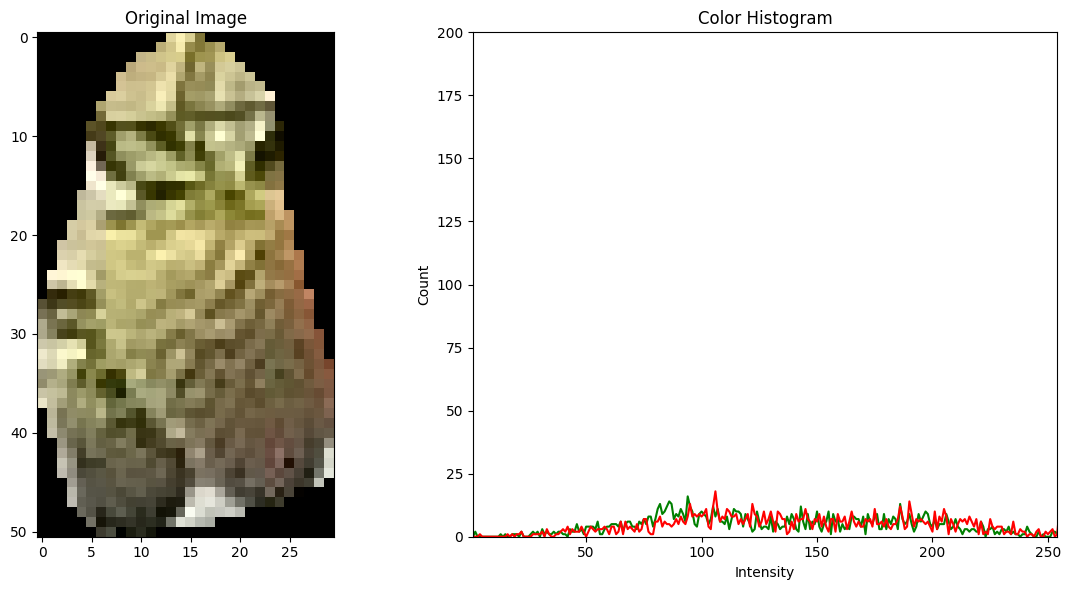

[ actual target : semi-ripe => predicted target : ripe ]
r : 0.4743676994654524 / g : 0.2918481488814096


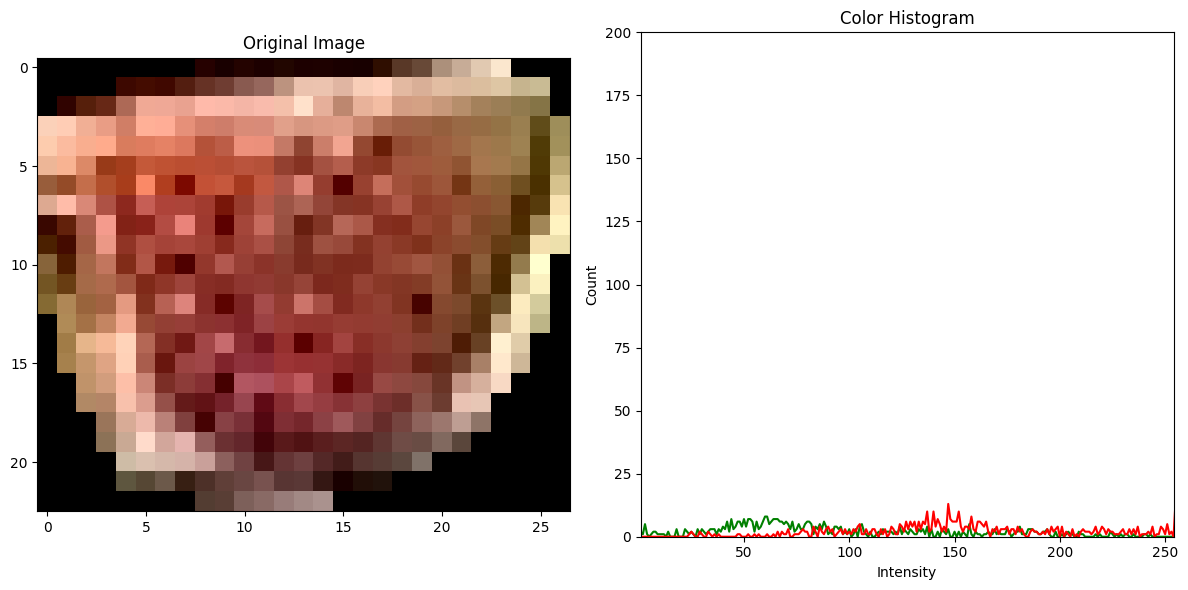

[ actual target : ripe => predicted target : semi-ripe ]
r : 0.4484287215632976 / g : 0.3091708612202002


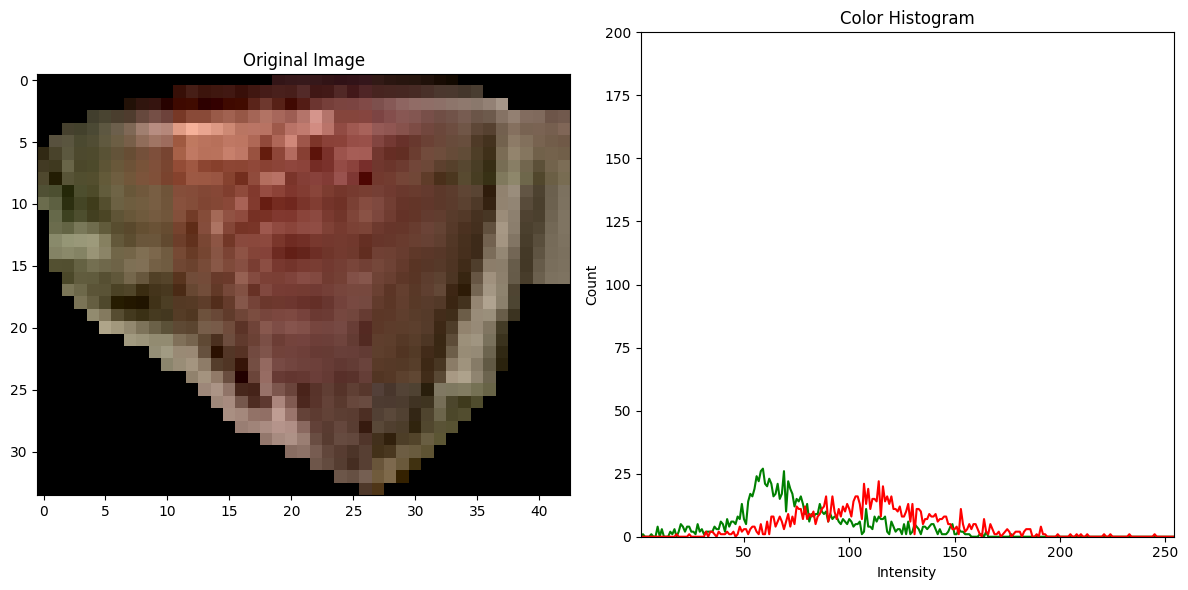

In [28]:
# 못 맞춘 경우 이미지 + 히스토그램

import os

for idx in data0_false.index:
    print("[ actual target :", data0_false.loc[idx, "actual_target"], "=> predicted target :", data0_false.loc[idx, "predicted_target"], "]")
    print("r :", data0_false.loc[idx, "origin_r"], "/ g :", data0_false.loc[idx, "origin_g"])
    img_path = os.path.join("trainset", data0_false.loc[idx, "actual_target"], data0_false.loc[idx, "file_name"])
    print_red_green_histogram(img_path)

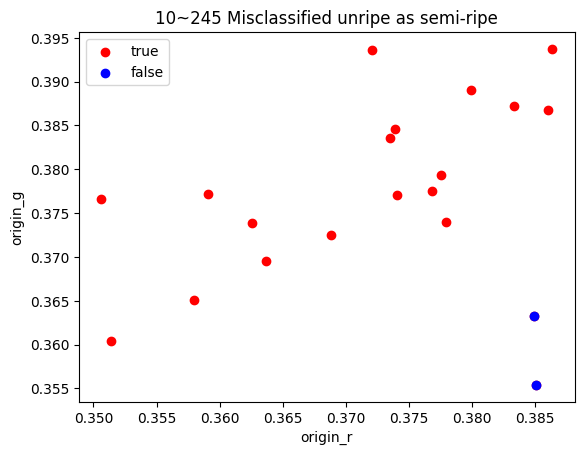

In [27]:
true = data0_pred_result[data0_pred_result["actual_target"] == "unripe"]
false = data0_false[data0_false["actual_target"] == "unripe"]

# 스캐터 플롯 그리기
plt.scatter(true['origin_r'], true['origin_g'], color='red', label='true')
plt.scatter(false['origin_r'], false['origin_g'], color='blue', label='false')

# 라벨 및 제목 추가
plt.xlabel('origin_r')
plt.ylabel('origin_g')

# 범례 추가
plt.legend()
plt.title("10~245 Misclassified unripe as semi-ripe")

# 그래프 표시
plt.show()

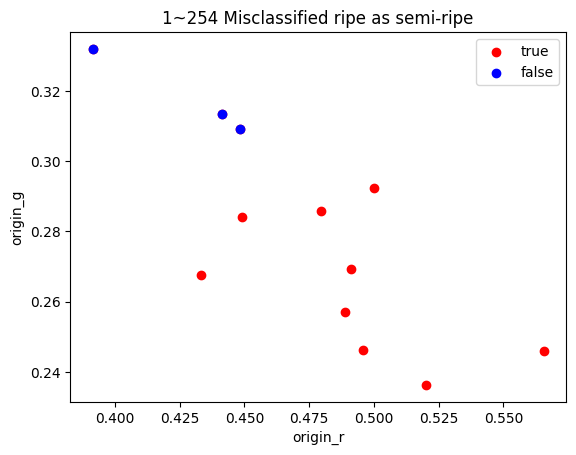

In [12]:
true = data0_pred_result[data0_pred_result["actual_target"] == "ripe"]
false = data0_false[data0_false["actual_target"] == "ripe"]

# 스캐터 플롯 그리기
plt.scatter(true['origin_r'], true['origin_g'], color='red', label='true')
plt.scatter(false['origin_r'], false['origin_g'], color='blue', label='false')

# 라벨 및 제목 추가
plt.xlabel('origin_r')
plt.ylabel('origin_g')

# 범례 추가
plt.legend()
plt.title("1~254 Misclassified ripe as semi-ripe")

# 그래프 표시
plt.show()

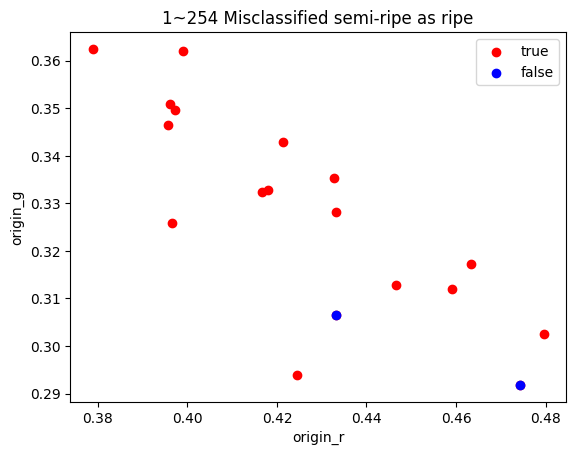

In [13]:
true = data0_pred_result[data0_pred_result["actual_target"] == "semi-ripe"]
false = data0_false[data0_false["actual_target"] == "semi-ripe"]

# 스캐터 플롯 그리기
plt.scatter(true['origin_r'], true['origin_g'], color='red', label='true')
plt.scatter(false['origin_r'], false['origin_g'], color='blue', label='false')

# 라벨 및 제목 추가
plt.xlabel('origin_r')
plt.ylabel('origin_g')

# 범례 추가
plt.legend()
plt.title("1~254 Misclassified semi-ripe as ripe")

# 그래프 표시
plt.show()

In [14]:
# data1 = pd.read_csv("./trainset/mask_rgb_info.csv")[['target', 'origin_r', 'origin_g']]
# data1.head()

In [15]:
# best_model, X_test_with_predictions = evaluate_knn_kfold(data1)

In [16]:
data3 = pd.read_csv("./trainset/mask_rgb_info3.csv")[['file_name', 'target', 'origin_r', 'origin_g']]
data3.head()

,file_name,target,origin_r,origin_g
0,F0016-C101-20220124-083000_image_mask_26_maske...,ripe,0.579987,0.243452
1,image_mask_33_masked_cropped.png,ripe,0.474343,0.282733
2,image_mask_19_masked_cropped.png,ripe,0.478642,0.260902
3,image_mask_16_masked_cropped copy.png,ripe,0.509042,0.287053
4,image_mask_22_masked_cropped.png,ripe,0.382729,0.309005


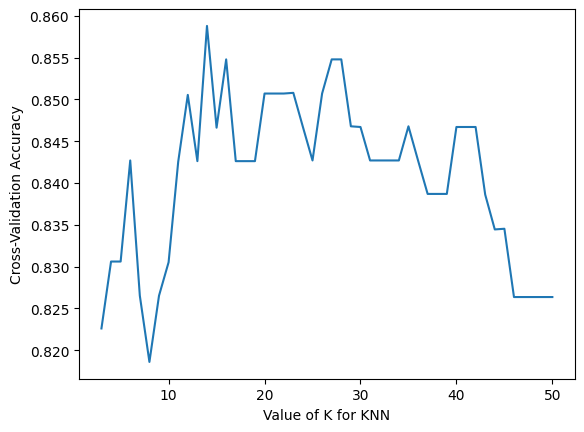

Best K: 14
Best Score: 0.8587755102040816
Classification Report:
              precision    recall  f1-score   support

        ripe       0.82      0.75      0.78        12
   semi-ripe       0.76      0.89      0.82        18
      unripe       1.00      0.90      0.95        20

    accuracy                           0.86        50
   macro avg       0.86      0.85      0.85        50
weighted avg       0.87      0.86      0.86        50

Confusion Matrix:
[[ 9  3  0]
 [ 2 16  0]
 [ 0  2 18]]


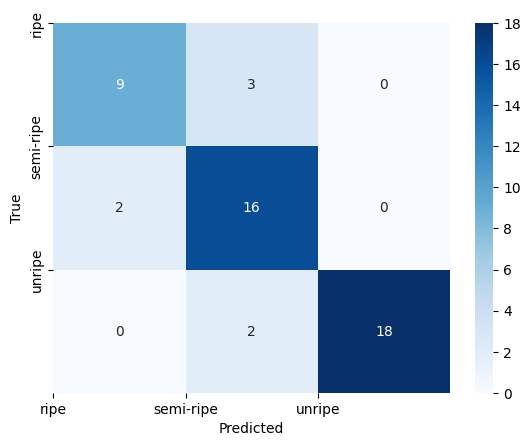

In [17]:
best_model3, X_test_with_predictions3 = evaluate_knn_kfold(data3[['target', 'origin_r', 'origin_g']])

In [18]:
# actual_target, predicted_target + file_name 매칭
data3_pred_result = pd.merge(X_test_with_predictions3, data3["file_name"], left_index=True, right_index=True, suffixes=('_all', '_correct'))
data3_pred_result.head()

,origin_r,origin_g,actual_target,predicted_target,file_name
192,0.361056,0.380764,unripe,unripe,image_mask_26_masked_cropped.png
20,0.465971,0.273832,ripe,ripe,image_mask_38_masked_cropped copy.png
138,0.403137,0.338962,semi-ripe,semi-ripe,image_mask_17_masked_cropped.png
51,0.593765,0.234667,ripe,ripe,image_mask_69_masked_cropped copy.png
14,0.551113,0.217892,ripe,ripe,image_mask_1_masked_cropped.png


In [19]:
# 못 맞춘 경우
data3_false = data3_pred_result[data3_pred_result["actual_target"] != data3_pred_result["predicted_target"]]

In [20]:
data3_false

,origin_r,origin_g,actual_target,predicted_target,file_name
137,0.436547,0.288821,semi-ripe,ripe,image_mask_9_masked_cropped.png
28,0.395290,0.325903,ripe,semi-ripe,image_mask_35_masked_cropped.png
18,0.443061,0.313020,ripe,semi-ripe,image_mask_43_masked_cropped.png
175,0.387296,0.356998,unripe,semi-ripe,image_mask_70_masked_cropped copy.png
243,0.386253,0.364898,unripe,semi-ripe,image_mask_79_masked_cropped.png
103,0.495540,0.298635,semi-ripe,ripe,image_mask_43_masked_cropped copy.png
59,0.462369,0.306054,ripe,semi-ripe,image_mask_84_masked_cropped.png


actual target : semi-ripe => predicted target : ripe
r : 0.4365467523488022 / g : 0.2888213283442469


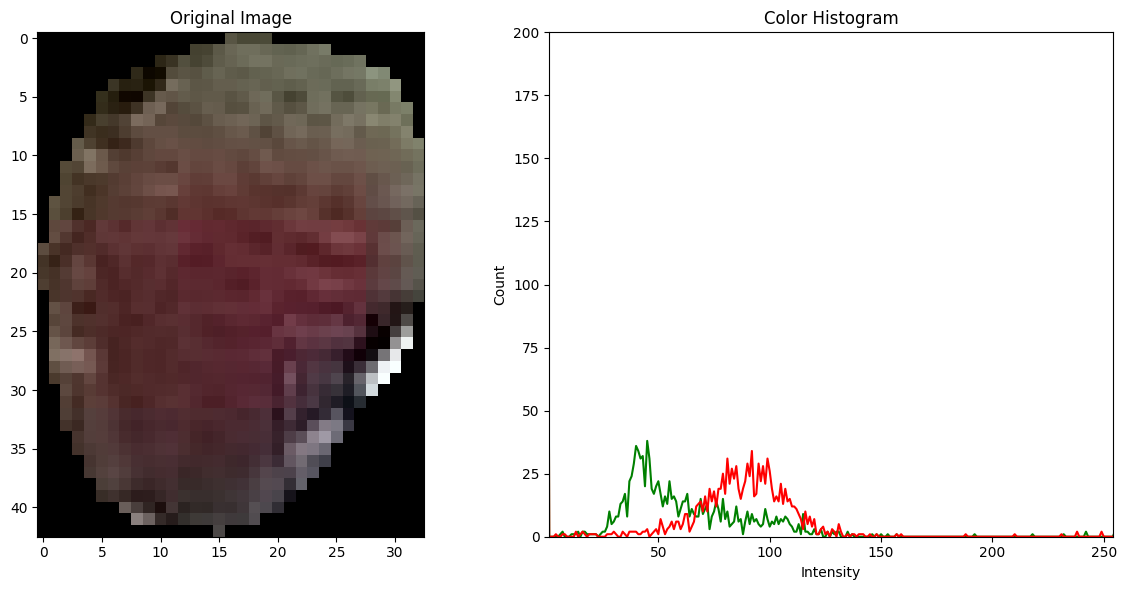

actual target : ripe => predicted target : semi-ripe
r : 0.3952898250269508 / g : 0.3259031981645797


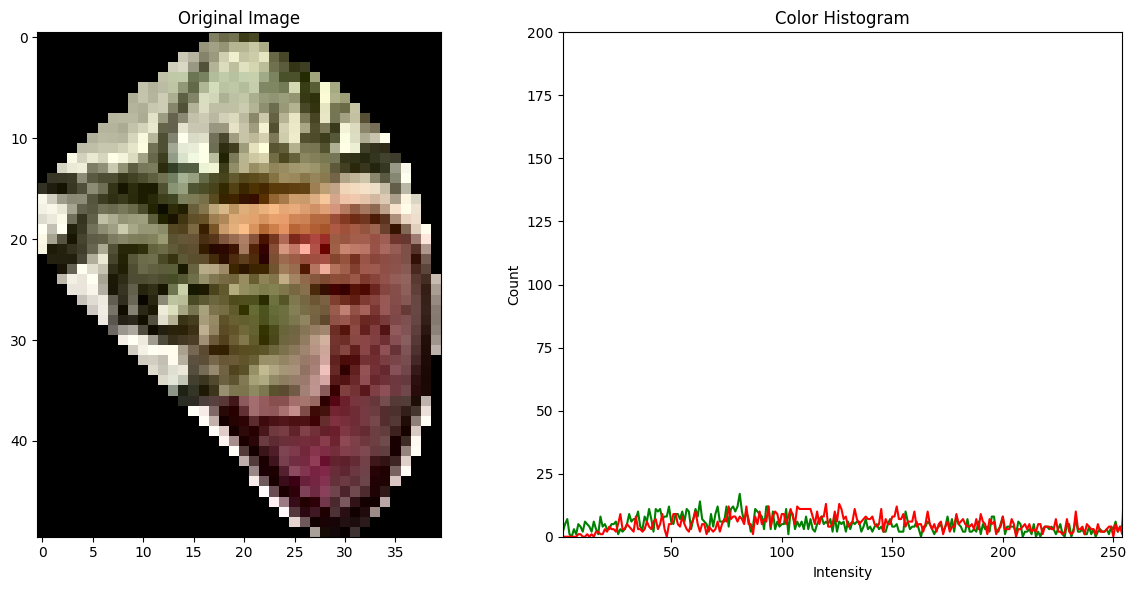

actual target : ripe => predicted target : semi-ripe
r : 0.4430608521931254 / g : 0.3130203461426135


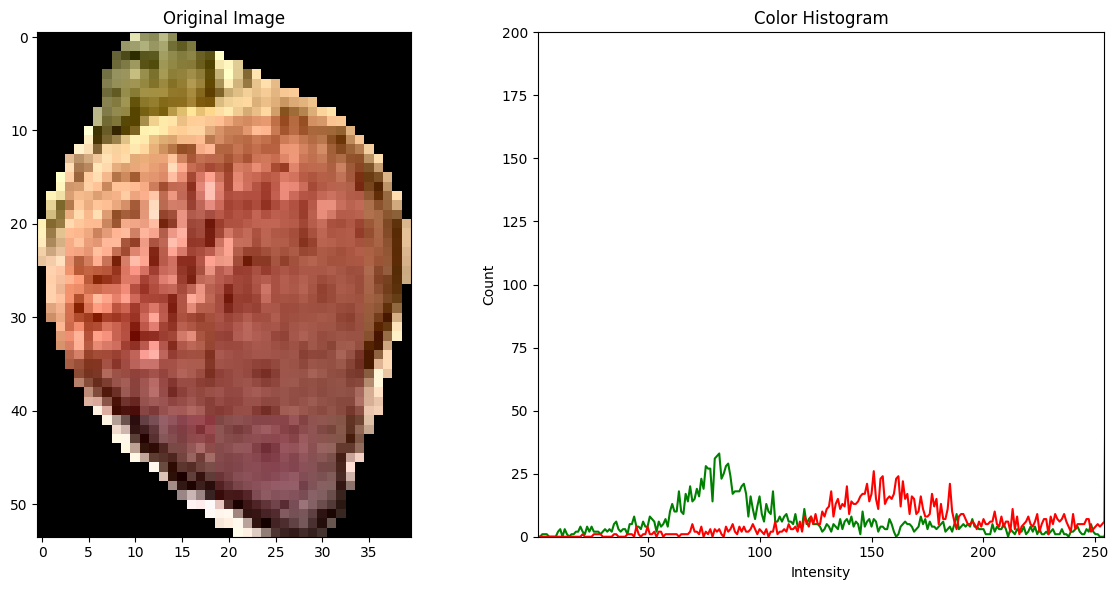

actual target : unripe => predicted target : semi-ripe
r : 0.3872959456842441 / g : 0.3569977482352315


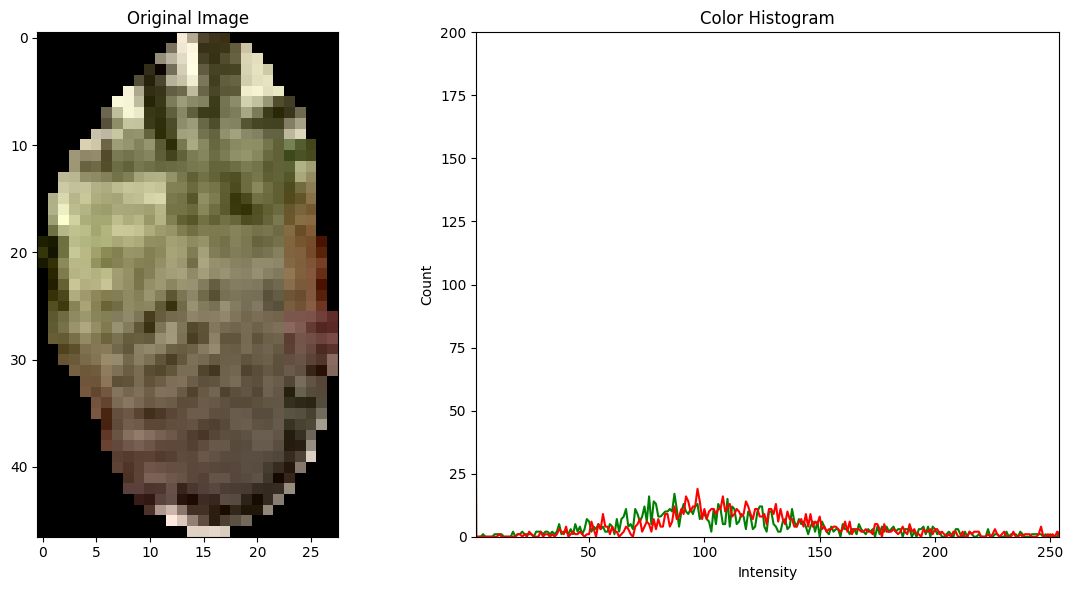

actual target : unripe => predicted target : semi-ripe
r : 0.3862527539617232 / g : 0.3648979375149311


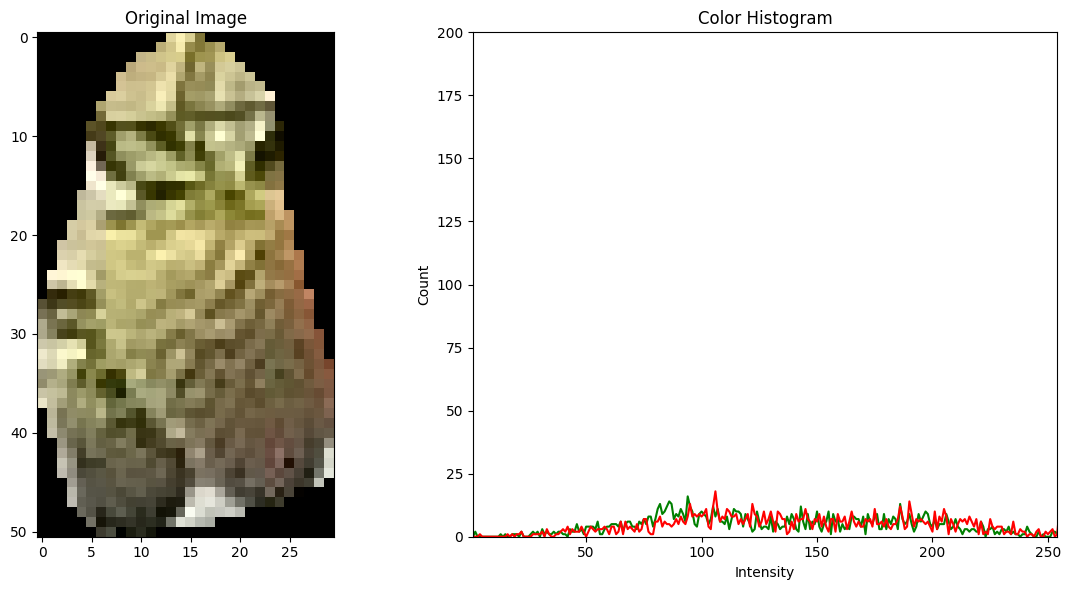

actual target : semi-ripe => predicted target : ripe
r : 0.4955404409765501 / g : 0.2986353162954899


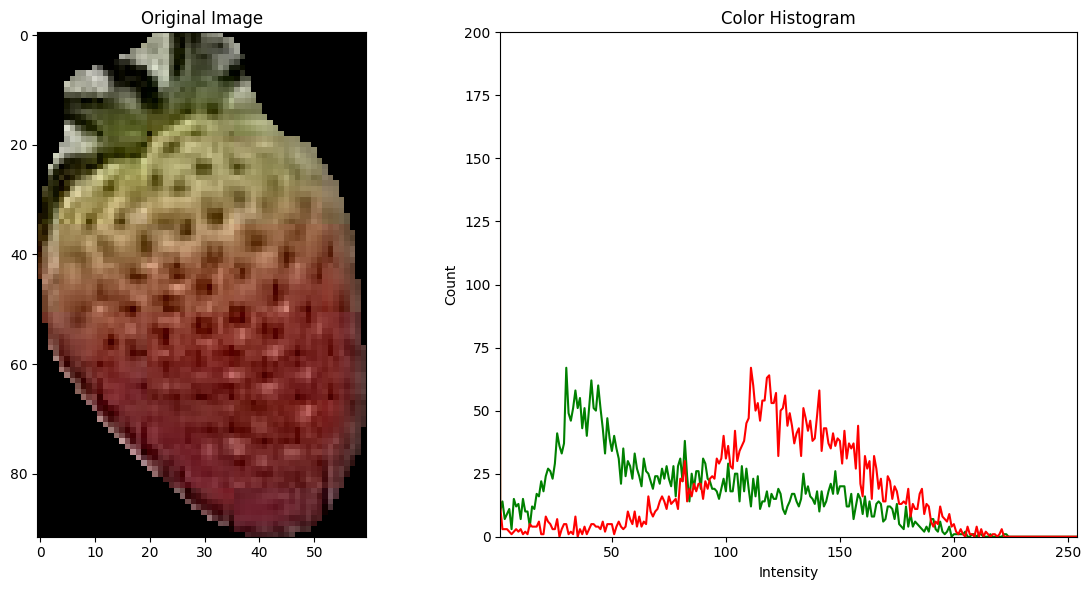

actual target : ripe => predicted target : semi-ripe
r : 0.4623687902953661 / g : 0.306053851482159


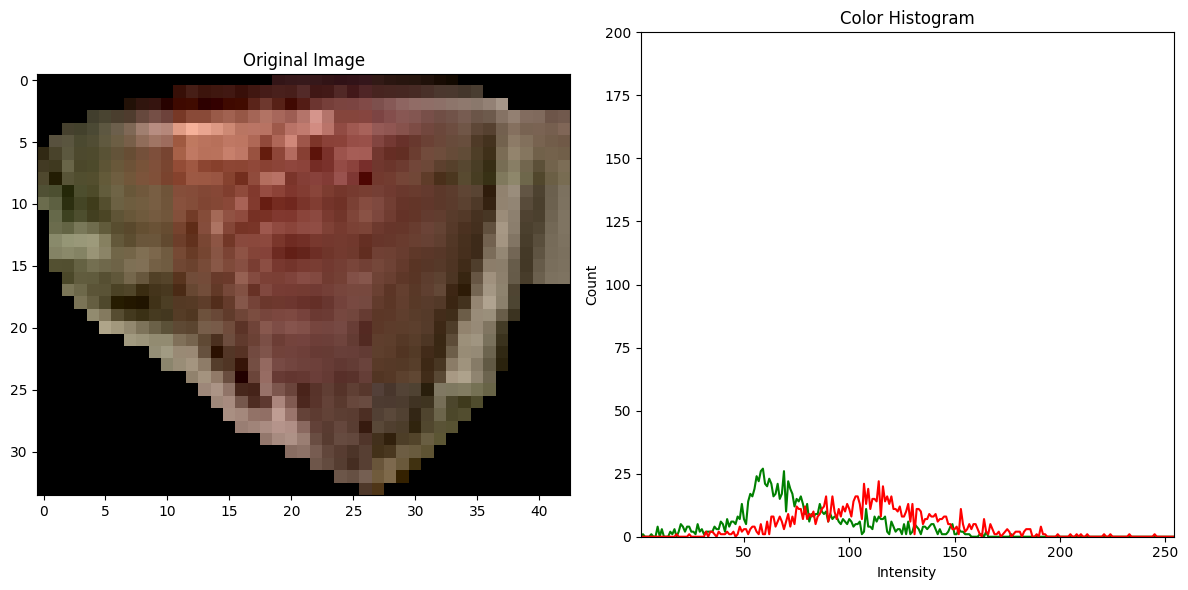

In [29]:
# 못 맞춘 경우 이미지 + 히스토그램

import os

for idx in data3_false.index:
    print("actual target :", data3_false.loc[idx, "actual_target"], "=> predicted target :", data3_false.loc[idx, "predicted_target"])
    print("r :", data3_false.loc[idx, "origin_r"], "/ g :", data3_false.loc[idx, "origin_g"])
    img_path = os.path.join("trainset", data3_false.loc[idx, "actual_target"], data3_false.loc[idx, "file_name"])
    print_red_green_histogram(img_path)

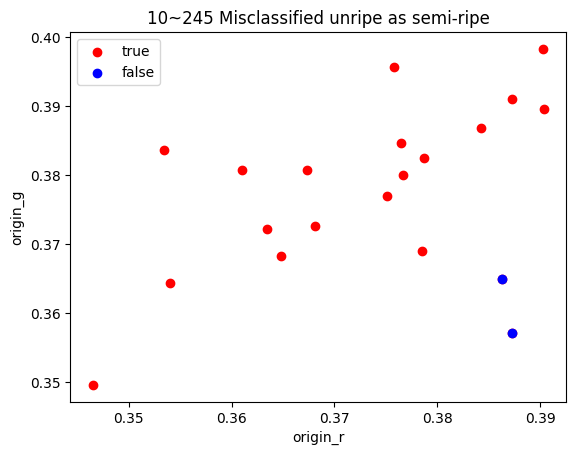

In [24]:
true = data3_pred_result[data3_pred_result["actual_target"] == "unripe"]
false = data3_false[data3_false["actual_target"] == "unripe"]

# 스캐터 플롯 그리기
plt.scatter(true['origin_r'], true['origin_g'], color='red', label='true')
plt.scatter(false['origin_r'], false['origin_g'], color='blue', label='false')

# 라벨 및 제목 추가
plt.xlabel('origin_r')
plt.ylabel('origin_g')

# 범례 추가
plt.legend()
plt.title("10~245 Misclassified unripe as semi-ripe")

# 그래프 표시
plt.show()

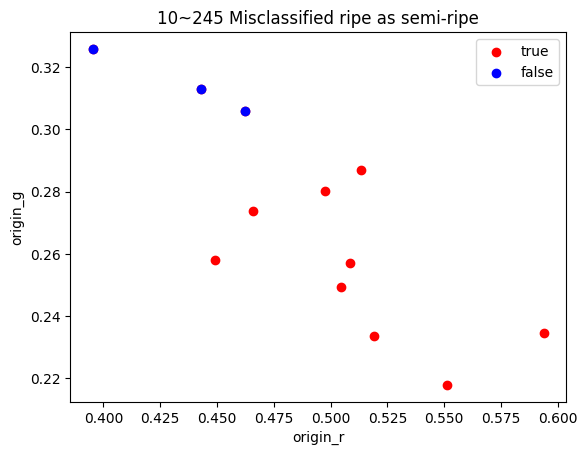

In [22]:
true = data3_pred_result[data3_pred_result["actual_target"] == "ripe"]
false = data3_false[data3_false["actual_target"] == "ripe"]

# 스캐터 플롯 그리기
plt.scatter(true['origin_r'], true['origin_g'], color='red', label='true')
plt.scatter(false['origin_r'], false['origin_g'], color='blue', label='false')

# 라벨 및 제목 추가
plt.xlabel('origin_r')
plt.ylabel('origin_g')

# 범례 추가
plt.legend()
plt.title("10~245 Misclassified ripe as semi-ripe")

# 그래프 표시
plt.show()

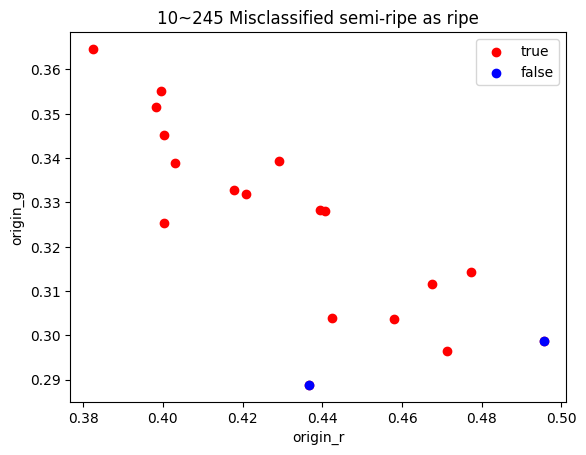

In [23]:
true = data3_pred_result[data3_pred_result["actual_target"] == "semi-ripe"]
false = data3_false[data3_false["actual_target"] == "semi-ripe"]

# 스캐터 플롯 그리기
plt.scatter(true['origin_r'], true['origin_g'], color='red', label='true')
plt.scatter(false['origin_r'], false['origin_g'], color='blue', label='false')

# 라벨 및 제목 추가
plt.xlabel('origin_r')
plt.ylabel('origin_g')

# 범례 추가
plt.legend()
plt.title("10~245 Misclassified semi-ripe as ripe")

# 그래프 표시
plt.show()